# Stationarity and detrending (ADF/KPSS)
[Documentation](https://www.statsmodels.org/dev/examples/notebooks/generated/stationarity_detrending_adf_kpss.html)

-------------

Stationarity means that the statistical properties of a time series i.e. mean, variance and covariance do not change over time. Many statistical models require the series to be stationary to make effective and precise predictions.

Two statistical tests would be used to check the stationarity of a time series – Augmented Dickey Fuller (“ADF”) test and Kwiatkowski-Phillips-Schmidt-Shin (“KPSS”) test. A method to convert a non-stationary time series into stationary series shall also be used.

This first cell imports standard packages and sets plots to appear inline.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
import warnings

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss

Sunspots dataset is used. It contains yearly (1700-2008) data on sunspots from the National Geophysical Data Center.

In [2]:
sunspots = sm.datasets.sunspots.load_pandas().data
sunspots.index = pd.Index(sm.tsa.datetools.dates_from_range("1700", "2008"))
del sunspots["YEAR"]
sunspots

,SUNACTIVITY
1700-12-31,5.0
1701-12-31,11.0
1702-12-31,16.0
1703-12-31,23.0
1704-12-31,36.0
...,...
2004-12-31,40.4
2005-12-31,29.8
2006-12-31,15.2
2007-12-31,7.5


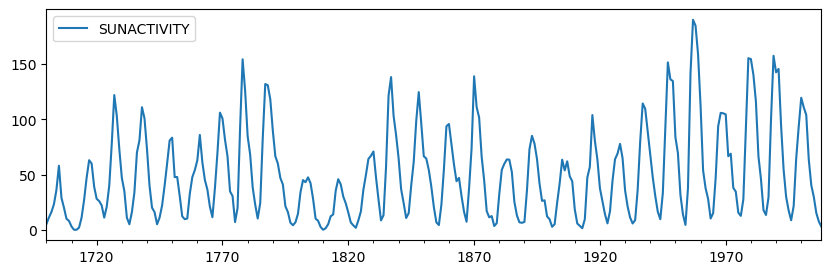

In [3]:
sunspots.plot(figsize=(10, 3))
plt.show()

-------------

## ADF test

ADF test is used to determine the presence of unit root in the series, and hence helps in understand if the series is stationary or not. The null and alternate hypothesis of this test are:

> * **Null Hypothesis ($H_o$)**: The series has a unit root (Non stationary).
> * **Alternate Hypothesis ($H_a$)**: The series has no unit root.

If the null hypothesis in failed to be rejected, this test may provide evidence that the series is non-stationary.

A function is created to carry out the ADF test on a time series.

In [4]:
def adf_test(timeseries):
    print("Results of Dickey-Fuller Test:")
    dftest = adfuller(timeseries, autolag="AIC")
    dfoutput = pd.Series(
        dftest[0:4],
        index=["Test Statistic","p-value","#Lags Used","Number of Observations Used"],
    )
    for key, value in dftest[4].items():
        dfoutput["Critical Value (%s)" % key] = value
    print(dfoutput)

The ADF tests gives the following results – test statistic, p value and the critical value at 1%, 5% , and 10% confidence intervals.

ADF test is now applied on the data.

In [5]:
adf_test(sunspots["SUNACTIVITY"])

Results of Dickey-Fuller Test:
Test Statistic                  -2.837781
p-value                          0.053076
#Lags Used                       8.000000
Number of Observations Used    300.000000
Critical Value (1%)             -3.452337
Critical Value (5%)             -2.871223
Critical Value (10%)            -2.571929
dtype: float64


**Based upon the significance level of 0.05 and the p-value of ADF test, the null hypothesis can not be rejected. Hence, the series is non-stationary.**

-------------

## KPSS test

KPSS is another test for checking the stationarity of a time series. The null and alternate hypothesis for the KPSS test are opposite that of the ADF test.

> * **Null Hypothesis ($H_o$)**: The process is trend stationary.
> * **Alternate Hypothesis ($H_a$)**: The series has a unit root (series is not stationary).

A function is created to carry out the KPSS test on a time series.

In [6]:
def kpss_test(timeseries):
    warnings.filterwarnings("ignore")
    print("Results of KPSS Test:")
    
    # regression="c" : The data is stationary around a constant (default).
    # regression="ct": The data is stationary around a trend.
    kpsstest = kpss(timeseries, regression="c", nlags="auto") 
    kpss_output = pd.Series(kpsstest[0:3], index=["Test Statistic", "p-value", "Lags Used"])
    for key, value in kpsstest[3].items():
        kpss_output["Critical Value (%s)" % key] = value
    warnings.filterwarnings("default")
    print(kpss_output)

The KPSS tests gives the following results – test statistic, p value and the critical value at 1%, 5% , and 10% confidence intervals.

KPSS test is now applied on the data.

In [7]:
kpss_test(sunspots["SUNACTIVITY"])

Results of KPSS Test:
Test Statistic           0.669866
p-value                  0.016285
Lags Used                7.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


**Based upon the significance level of 0.05 and the p-value of KPSS test, there is evidence for rejecting the null hypothesis in favor of the alternative. Hence, the series is non-stationary as per the KPSS test.**

-------------

It is always better to apply both the tests, so that it can be ensured that the series is truly stationary. Possible outcomes of applying these stationary tests are as follows:

- Case 1: Both tests conclude that the series is not stationary - The series is not stationary
- Case 2: Both tests conclude that the series is stationary - The series is stationary
- Case 3: KPSS indicates stationarity and ADF indicates non-stationarity - The series is trend stationary. Trend needs to be removed to make series strict stationary. The detrended series is checked for stationarity.
- Case 4: KPSS indicates non-stationarity and ADF indicates stationarity - The series is difference stationary. Differencing is to be used to make series stationary. The differenced series is checked for stationarity.

-------------

## Detrending by Differencing

It is one of the simplest methods for detrending a time series. A new series is constructed where the value at the current time step is calculated as the difference between the original observation and the observation at the previous time step.

Differencing is applied on the data and the result is plotted.

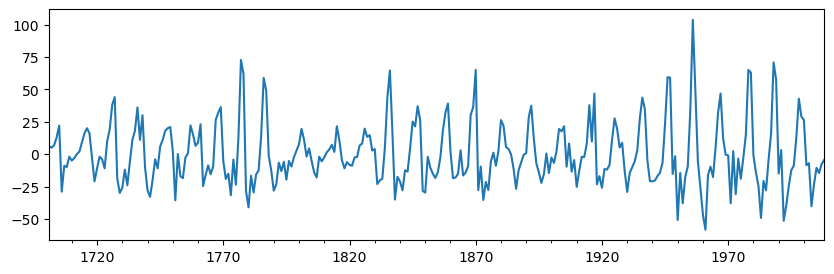

In [8]:
sunspots["SUNACTIVITY_diff"] = sunspots["SUNACTIVITY"] - sunspots["SUNACTIVITY"].shift(1)
sunspots["SUNACTIVITY_diff"].dropna().plot(figsize=(10, 3))
plt.show()

ADF test is now applied on these detrended values and stationarity is checked.

In [9]:
adf_test(sunspots["SUNACTIVITY_diff"].dropna())

Results of Dickey-Fuller Test:
Test Statistic                -1.486166e+01
p-value                        1.715552e-27
#Lags Used                     7.000000e+00
Number of Observations Used    3.000000e+02
Critical Value (1%)           -3.452337e+00
Critical Value (5%)           -2.871223e+00
Critical Value (10%)          -2.571929e+00
dtype: float64


**Based upon the p-value of ADF test, there is evidence for rejecting the null hypothesis in favor of the alternative. Hence, the series is strict stationary now.**

KPSS test is now applied on these detrended values and stationarity is checked.

In [10]:
kpss_test(sunspots["SUNACTIVITY_diff"].dropna())

Results of KPSS Test:
Test Statistic           0.021193
p-value                  0.100000
Lags Used                0.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


**Based upon the p-value of KPSS test, the null hypothesis can not be rejected. Hence, the series is stationary.**

-------------

## Conclusion

* Two tests for checking the stationarity of a time series are used, namely ADF test and KPSS test. 
* Detrending is carried out by using differencing. 
* Trend stationary time series is converted into strict stationary time series. 
* Requisite forecasting model can now be applied on a stationary time series data.

-------------